# **NSW Covid-19 Dataset Analysis**
This notebook analyses the **COVID-19** dataset of New South Wales by processing, visualizing, and grouping data using *Python* .


## Task 2. Loading Data and doing some analysis
After signing up for google colab and creating jupyter notebook, we use the given link to download the data for analysis. And I uploaded it to github for easy access.

In [ ]:
import pandas as pd

url = "https://github.com/bobbhai69/ITEC203_Lab_repo/raw/refs/heads/main/Lab1/Data/c19_location_09.24.csv"
covidData = pd.read_csv(url, encoding="Latin-1")



>As we load the dataset from drive, and in my case I was getting an error message when I ran the code, "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 12071: invalid continuation byte". Then I tried specifying encoding after a quick google search and then we display the info, first 5 rows and check for missing values.
>Later from the canvas, according to the NLiC, used Latin-1 as encoding.

In [ ]:

# Displaying basic infomations
print("Basic Information about data set")
print(covidData.info())
print("First 5 rows of data")
print(covidData.head())
print("Checking for missing values")
print(covidData.isnull().sum())

Basic Information about data set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             217 non-null    object 
 1   Address              215 non-null    object 
 2   Latitude             215 non-null    float64
 3   Longitude            215 non-null    float64
 4   Dates                217 non-null    object 
 5   Date_1               217 non-null    object 
 6   Time_start_1         199 non-null    object 
 7   Time_end_1           196 non-null    object 
 8   Date_2               43 non-null     object 
 9   Time_start_2         28 non-null     object 
 10  Time_end_2           26 non-null     object 
 11  Date_3               24 non-null     object 
 12  Time_start_3         9 non-null      object 
 13  Time_end_3           7 non-null      object 
 14  Date_4               22 non-null     object 
 15  Time_st

### Short Summary
The data shows the actions; either monitoring for symptoms or self-isolating and getting tested immediately, needed to be taken if they were present in the given location within the specified time-period. We can also see that several columns (eg: Date_2, Time_start_2, etc) contain many null values which suggests they may not have been consistently recorded.

## Visualization and Grouping of Data
After loading and having a look at the data, it seemed it needed some cleansing and prep, which we did using the code shown below. We saved the cleansed dataset into a new csv file locally and we printed out basic information from the new cleaned file.


In [ ]:
# Converting relevant date columns to datetime format
date_columns = ["Date_1", "Date_Status_Current", "Date_Status_Expired"]
for col in date_columns:
    covidData[col] = pd.to_datetime(covidData[col], format="%d/%m/%Y", errors="coerce")

# Selecting relevant columns for analysis
covidData_cleaned = covidData[["Location","Address","Latitude", "Longitude", "Date_1", "Time_start_1", "Time_end_1", "Action"]]

# Dropping rows with missing latitude or longitude (for mapping)
covidData_cleaned = covidData_cleaned.dropna(subset=["Latitude", "Longitude"])

# Saving the cleaned data to a new CSV file
covidData_cleaned.to_csv("cleaned_covid_data.csv", index=False)

# Displaying clean dataset info
print("Cleaned Dataset Info:")
print(covidData_cleaned.info())

# Displaying first few rows
print("First Few Rows of Cleaned Dataset:")
print(covidData_cleaned.head())

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 0 to 216
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Location      215 non-null    object        
 1   Address       215 non-null    object        
 2   Latitude      215 non-null    float64       
 3   Longitude     215 non-null    float64       
 4   Date_1        215 non-null    datetime64[ns]
 5   Time_start_1  198 non-null    object        
 6   Time_end_1    195 non-null    object        
 7   Action        214 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 15.1+ KB
None
First Few Rows of Cleaned Dataset:
                                  Location  \
0         Adamstown: St Pius X High School   
1     Albion Park: C1 Speed Indoor Karting   
2                   Albion Park: McDonalds   
3  Ashfield: New Shanghai Night restaurant   
4       Ashfield: The Crocodile Farm 

>For further visualization and analysis, we import the clean data and do analysis on it.

<Figure size 1200x600 with 0 Axes>

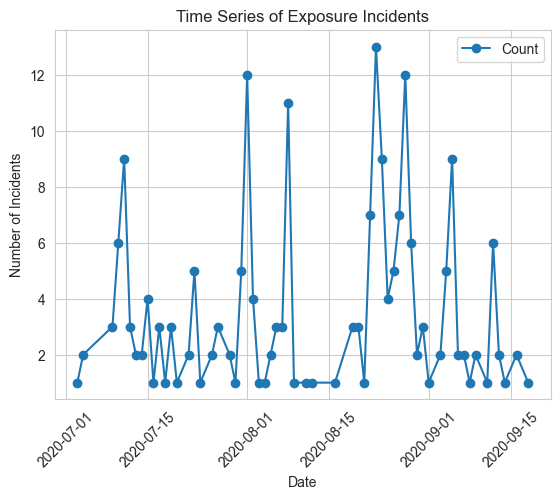

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned dataset
covidData_cleaned = pd.read_csv("cleaned_covid_data.csv", parse_dates=["Date_1"])

# Setting plot style
sns.set_style("whitegrid")

# Grouping data by date and count occurences
covidData_grouped = covidData_cleaned.groupby(covidData_cleaned['Date_1'].dt.date).size().reset_index(name='Count')

# Plotting time series of exposure incidents
plt.figure(figsize=(12, 6))
covidData_grouped.plot(x='Date_1', y='Count', kind='line', marker='o')
plt.title('Time Series of Exposure Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

## Analyzing Actions Taken
Our goal here is to visualize the distribution of actions("monitor for symptoms", "self isolate")

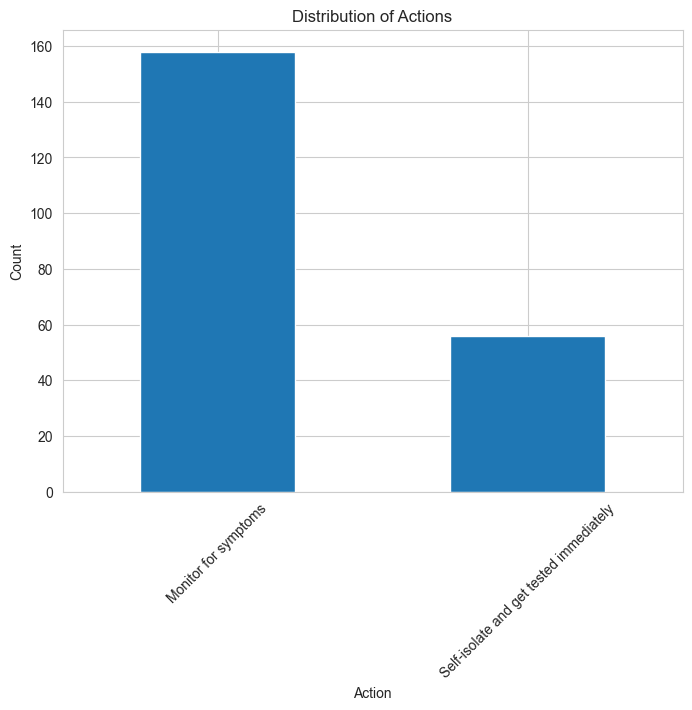

In [ ]:
#C Counting occurences of each Action
action_counts = covidData_cleaned['Action'].value_counts()

# Plot action distribution
plt.figure(figsize=(8, 6))
action_counts.plot(kind='bar')
plt.title('Distribution of Actions')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#

## Map Exposure Locations
We plot exposure locations on a geographical map  using folium.
>Folium is a p ython library that provides access to the mapping capabilities of the Leaflet JavaScript library. It allows you to create interactive geographic visualizations and maps that can be shared as websites.

In [ ]:
# if you get error saying folium module not found UNCOMMENT the comment below.
# get_ipython().system('pip install folium')
import folium


# Initializing a map centered at an average location
map_average = folium.Map(location = [covidData_cleaned["Latitude"].mean(), covidData_cleaned["Longitude"].mean()], zoom_start = 6, )

# To hardcode the frame size of the map
fig = folium.Figure(width = 500, height = 500)

# Adding markers for each location
for index, row in covidData_cleaned.iterrows():
    folium.Marker(
        location = [row['Latitude'], row['Longitude']],
        popup=f"{row['Location']} ({row['Date_1'].strftime('%d-%b-%y')})/nAction: {row['Action']}",
        icon = folium.Icon(color = "red" if "isolate" in str(row["Action"]).lower() else "blue")
    ).add_to(map_average)


# Saving and displaying the map
# map_file_path =  "/content/drive/My Drive/map_average.html"
# map_average.save(map_file_path)

map_average.add_to(fig)

## Peak Exposure Time Analysis
Identifying peak hours when exposure incidents occured.

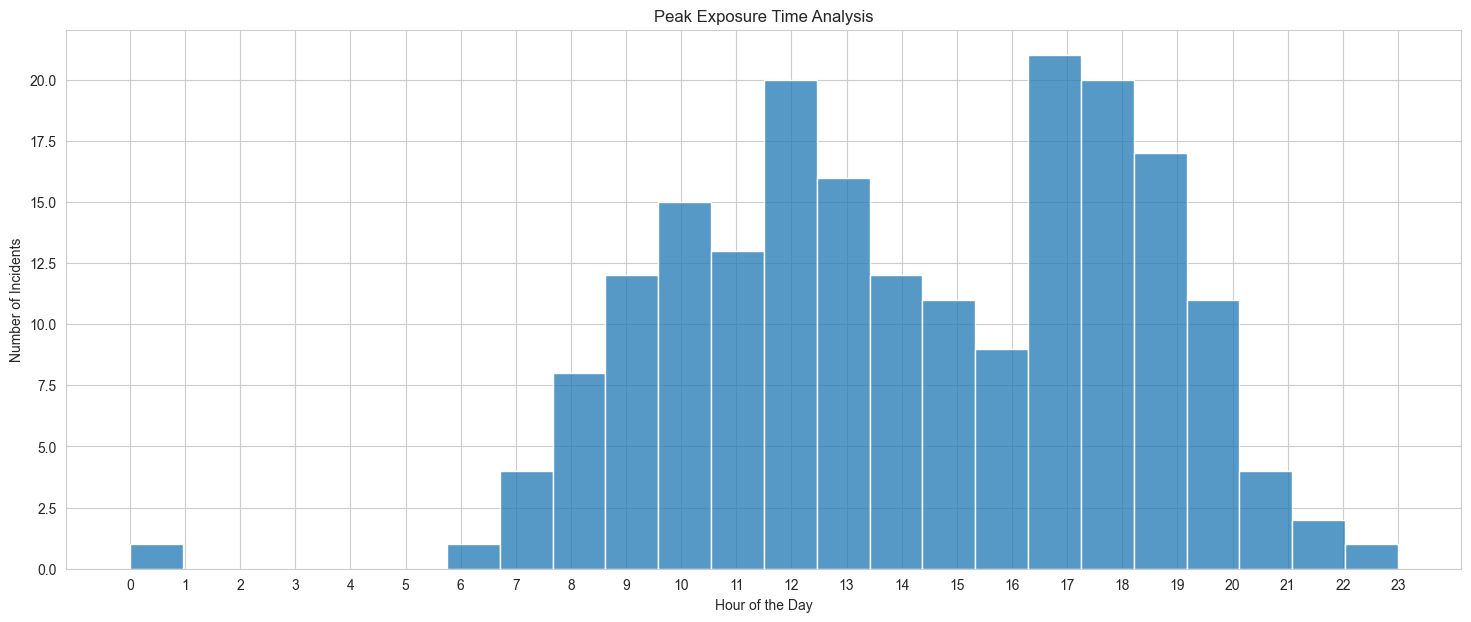

In [ ]:
covidData_cleaned['Time_start_1'] = pd.to_datetime(covidData_cleaned['Time_start_1'], format='%H:%M', errors='coerce').dt.hour

plt.figure(figsize=(18, 7))
sns.histplot(covidData_cleaned['Time_start_1'].dropna(), bins=24, kde=False)
plt.title('Peak Exposure Time Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24))
plt.show()

## Task 3
Exploring the hand-write digit image dataset from *Scikit-learn* Digits datset

(1797, 64)


<Figure size 640x480 with 0 Axes>

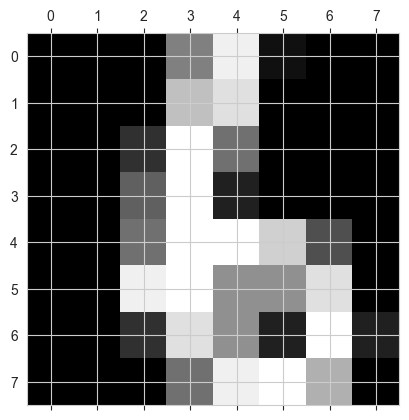

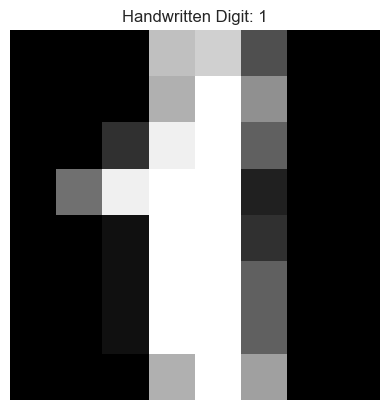

In [ ]:
# if you get error saying sklearn module not found UNCOMMENT the comment below.
# get_ipython().system('pip install scikit-learn') 

from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()
print(digits.data.shape)
(1797, 8, 8)
plt.gray()
plt.matshow(digits.images[16])
plt.show()

# Selecting a random non-zero digit image
sample_index = np.where(digits.target != 0)[0][0] #Finding first non-zero digits
image = digits.images[sample_index]
label = digits.target[sample_index]

# Plotting the image
plt.imshow(image, cmap='gray')
plt.title(f'Handwritten Digit: {label}')
plt.axis('off')
plt.show()


## More Exploration and Observation


Dataset Shape: (1797, 8, 8)
Feature Shape: (1797, 64)
Unique classes: [0 1 2 3 4 5 6 7 8 9]


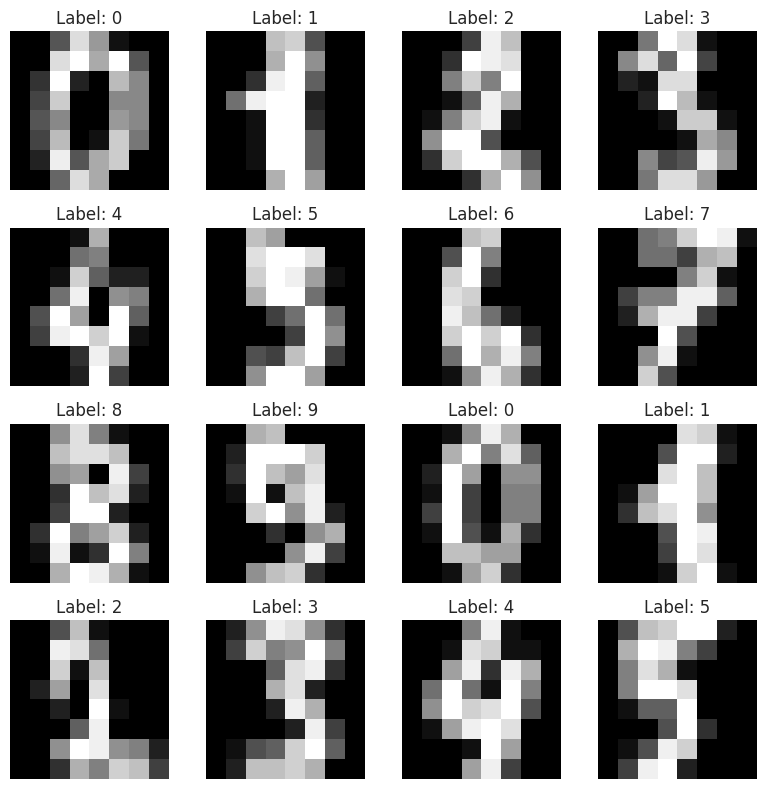

In [ ]:
# Printing dataset details
print(f"Dataset Shape: {digits.images.shape}")
print(f"Feature Shape: {digits.data.shape}")
print(f"Unique classes: {np.unique(digits.target)}")

# Displaying multiple samples from dataset
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## Observations


1.   The dataset contains 1797 images of handwritten digits.
2.   Each image is 8x8 pixels.
3.   The label ranges from 0-9.
4.   The grayscale images are clear and well-formed which makes them suitable for machine learning models.

